# Car Breakdown Prediction Challenge

**Course:** Artificial Intelligence  
**Goal:** Predict whether a car will experience a mechanical breakdown within the next 30 days.

This notebook covers:
- Exploratory Data Analysis (EDA)
- Preprocessing
- Modeling with Random Forest (baseline)
- Extra model
- Evaluation
- Kaggle submission

## 1. Imports

In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## 2. Load the data

In [16]:
train_df = pd.read_csv("train_CarBreakDown.csv")
test_df = pd.read_csv("test_CarBreakDown.csv")

train_df.head()
train_df.info()
train_df.describe()

<class 'pandas.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         1050 non-null   int64  
 1   vehicle_brand              1029 non-null   str    
 2   vehicle_age_years          1034 non-null   float64
 3   mileage_km                 1033 non-null   float64
 4   engine_hours               1035 non-null   float64
 5   last_service_km_ago        1040 non-null   float64
 6   oil_quality_pct            1014 non-null   float64
 7   avg_trip_length_km         1038 non-null   float64
 8   weather_exposure           1037 non-null   str    
 9   fuel_type                  1036 non-null   str    
 10  cleanliness_score          995 non-null    float64
 11  driver_satisfaction_score  1037 non-null   float64
 12  tyre_type                  1033 non-null   str    
 13  breakdown_next_30_days     1050 non-null   int64  
dtypes: 

,id,vehicle_age_years,mileage_km,engine_hours,last_service_km_ago,oil_quality_pct,avg_trip_length_km,cleanliness_score,driver_satisfaction_score,breakdown_next_30_days
count,1050.000000,1034.000000,1.033000e+03,1035.000000,1040.000000,1014.000000,1038.000000,995.000000,1037.000000,1050.000000
mean,742.984762,9.399420,3.639119e+06,4368.929467,10681.075986,60.682779,38.861387,69.393768,6.972183,0.167619
std,430.089010,5.752228,2.585818e+07,2214.510223,9341.969609,20.298624,47.968702,15.570872,1.478278,0.373706
min,0.000000,0.000000,-1.829042e+02,-50.000000,10.869020,0.000000,1.011100,-13.171570,2.504369,0.000000
25%,372.250000,5.000000,8.338616e+04,2773.353090,3374.773323,47.377582,8.187057,58.902723,6.001099,0.000000
50%,740.500000,9.000000,1.202357e+05,3967.125562,8085.318122,60.528422,16.788852,69.504547,6.928004,0.000000
75%,1109.250000,14.000000,1.674871e+05,5432.498224,14455.318280,74.654436,44.308719,79.597898,8.022503,0.000000
max,1498.000000,20.000000,3.734539e+08,10298.582128,40592.195120,102.548055,201.015553,144.139920,10.291940,1.000000


## 2. Exploratory Data Analysis (EDA)

### 2.1 Target variable distribution

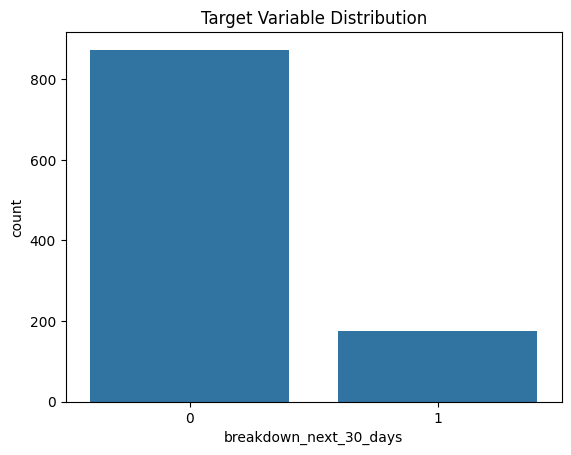

In [17]:
sns.countplot(x="breakdown_next_30_days", data=train_df)
plt.title("Target Variable Distribution")
plt.show()

### 2.2 Numerical feature analysis

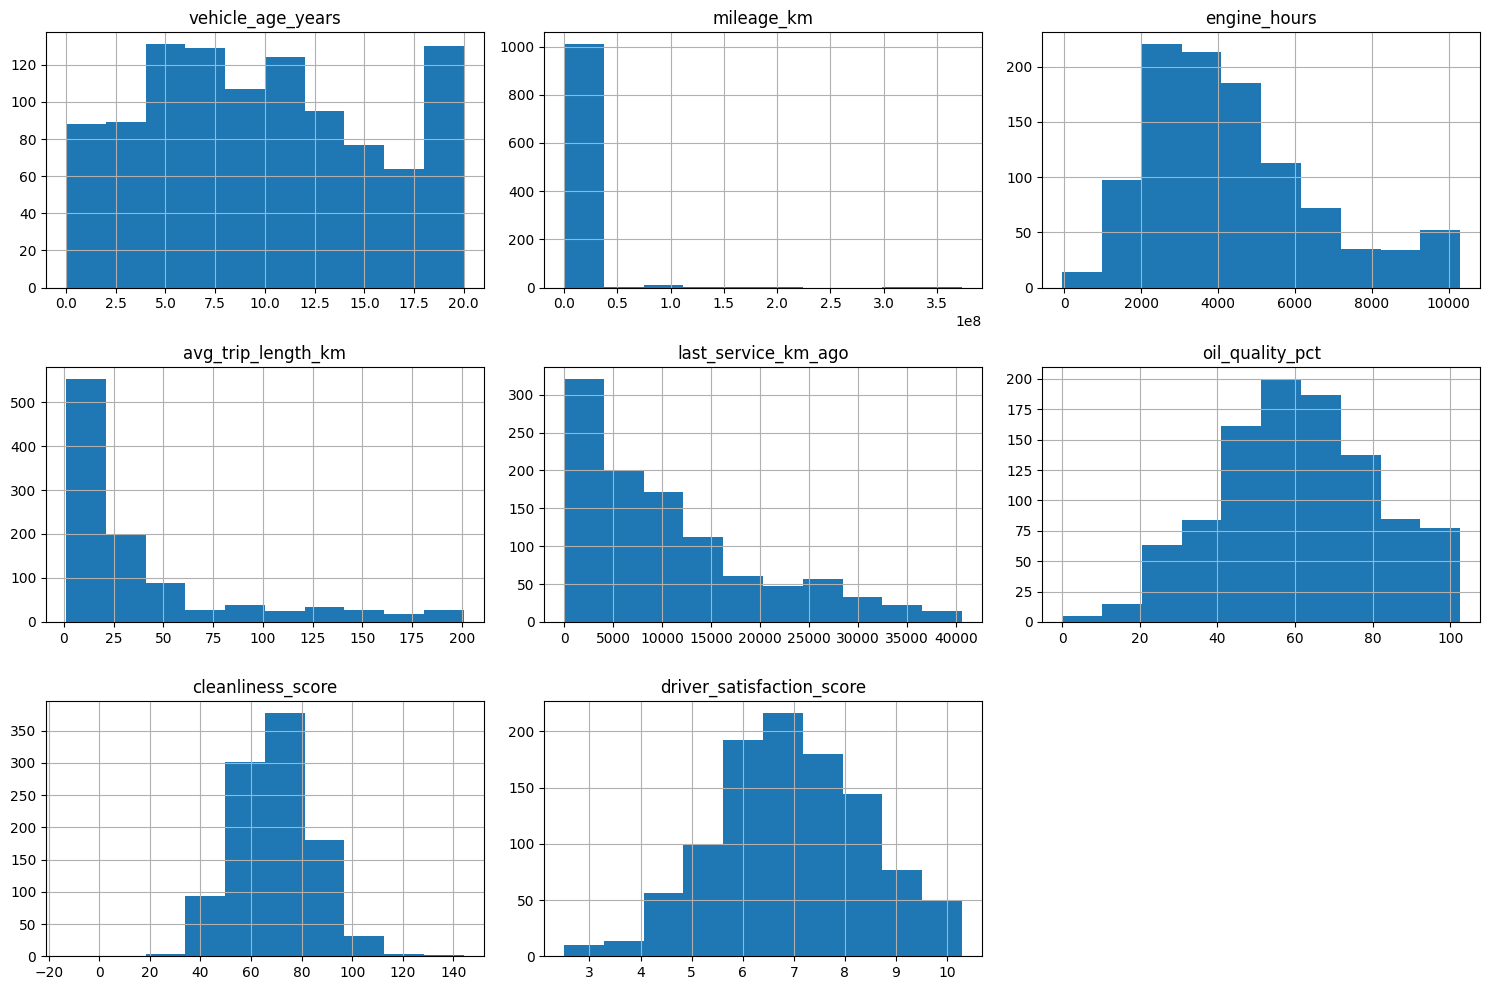

In [18]:
num_features = [
    "vehicle_age_years",
    "mileage_km",
    "engine_hours",
    "avg_trip_length_km",
    "last_service_km_ago",
    "oil_quality_pct",
    "cleanliness_score",
    "driver_satisfaction_score"
]

train_df[num_features].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

### 2.3 Categorical feature analysis

In [19]:
cat_features = [
    "vehicle_brand",
    "weather_exposure",
    "fuel_type",
    "tyre_type"
]

for col in cat_features:
    print(train_df[col].value_counts())

vehicle_brand
Ford          194
Toyota        193
Volkswagen    143
BMW           125
Hyundai       101
Renault        97
Volvo          93
Kia            69
other          14
Name: count, dtype: int64
weather_exposure
medium    428
low       384
high      204
other      21
Name: count, dtype: int64
fuel_type
petrol      435
diesel      372
hybrid      155
electric     54
other        20
Name: count, dtype: int64
tyre_type
summer        386
winter        332
all-season    299
other          16
Name: count, dtype: int64


## 3. Preprocessing

In [20]:
X = train_df.drop(["breakdown_next_30_days", "id"], axis=1)
y = train_df["breakdown_next_30_days"]

categorical_cols = X.select_dtypes(include=["object", "string", "category"]).columns
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numerical_cols)
    ]
)

## 4. Train-validation split

In [21]:
X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

## 5. Random Forest baseline model

In [22]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)

rf_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", rf_model)
])

rf_pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessing', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('cat', ...), ('num', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers c

## 6. Model evaluation (Random Forest)

Accuracy: 0.7714285714285715
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       175
           1       0.31      0.31      0.31        35

    accuracy                           0.77       210
   macro avg       0.59      0.59      0.59       210
weighted avg       0.77      0.77      0.77       210



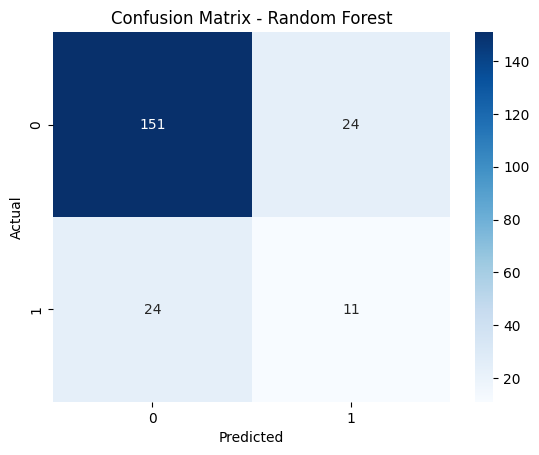

In [23]:
y_probs = rf_pipeline.predict_proba(X_val)[:, 1]

threshold = 0.25   # try 0.2–0.3 range
y_pred_rf = (y_probs > threshold).astype(int)

print("Accuracy:", accuracy_score(y_val, y_pred_rf))
print(classification_report(y_val, y_pred_rf))

cm = confusion_matrix(y_val, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

## 7. Kaggle submission

In [24]:
test_ids = test_df["id"]
test_features = test_df.drop("id", axis=1)

test_preds = rf_pipeline.predict(test_features)

submission = pd.DataFrame({
    "id": test_ids,
    "breakdown_next_30_days": test_preds
})

submission.to_csv("submission.csv", index=False)
submission.head()

,id,breakdown_next_30_days
0,1356,0
1,889,0
2,1190,0
3,122,0
4,1101,0


## 8. Extra model: Gradient Boosting

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer

In [26]:
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="mean"))
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor_gb = ColumnTransformer([
    ("num", numeric_transformer, numerical_cols),
    ("cat", categorical_transformer, categorical_cols)
])

In [27]:
gb_model = GradientBoostingClassifier(random_state=42)

gb_pipeline = Pipeline([
    ("preprocessing", preprocessor_gb),
    ("model", gb_model)
])

gb_pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessing', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers c

In [28]:
y_proba = model.predict_proba(X_val)[:, 1]
y_pred_custom = (y_proba > 0.3).astype(int)

print("Accuracy (GB):", accuracy_score(y_val, y_pred_custom))
print(classification_report(y_val, y_pred_custom))

cm_gb = confusion_matrix(y_val, y_pred_custom)
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()

NameError: name 'model' is not defined

In [ ]:
test_preds_gb = gb_pipeline.predict(test_features)

submission_gb = pd.DataFrame({
    "id": test_ids,
    "breakdown_next_30_days": test_preds_gb
})

submission_gb.to_csv("submission_gb.csv", index=False)
submission_gb.head()

## 9. GenAI usage statement

GenAI tools were used to help understand the structure of a standard
machine learning pipeline and to explore possible modeling approaches.

All preprocessing steps, model choices, evaluations, and interpretations
were made by the team and are fully understood and defendable.